In [1]:
# url을 가져와서 문서로 만드는 작업
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
with open('C:/Workspace/02.DataAnalysis/04.공공API_및_지도시각화/roadapikey.txt') as f:
    api_key = f.read()

In [3]:
key='S5FgzVMaI4VnSdDKqpL5KZxsUmhhyDuYp5uEtbgdkcjiNs15Aw4199t39wANmq%2BTUjhIm999jORaRGsMwuUDrQ%3D%3D'
numRows=10
staD=str(20200410)
endD=str(20210831)
numRows=30

In [4]:
url1='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='+ key
url2='&pageNo=1&numOfRows='+str(numRows)
url3='&startCreateDt='+staD+'&endCreateDt='+endD
url=url1+url2+url3
print(url)

http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=S5FgzVMaI4VnSdDKqpL5KZxsUmhhyDuYp5uEtbgdkcjiNs15Aw4199t39wANmq%2BTUjhIm999jORaRGsMwuUDrQ%3D%3D&pageNo=1&numOfRows=30&startCreateDt=20200410&endCreateDt=20210831


In [5]:
xml=requests.get(url)
soup=bs(xml.text,'html.parser')
#soup

In [6]:
data=soup.find_all('item')
con_lst=[]

In [7]:
for item in data:
    DEF_CNT = item.find('defcnt').text # 확진자수'
    Deat_CNT = item.find('deathcnt').text # 사망자수
    GUBUN = item.find('gubun').text # 지역'
    INC_DEC = item.find('incdec').text #전일대비 증감'
    STD_DAY = item.find('stdday').text # 기준일'
    ISOL_ING_CNT = item.find('isolingcnt').text#격리자수'
    OVER_FLOW_CNT = item.find('overflowcnt').text #해외유입'
    LOCAL_OCC_CNT = item.find('localocccnt').text #지역감염'
    con_lst.append({'stdday':STD_DAY,'ji':GUBUN,'isolingcnt':ISOL_ING_CNT,
                    'defcnt':DEF_CNT,'incdec':INC_DEC,'deathcnt':Deat_CNT,
                    'local':LOCAL_OCC_CNT,'overflow':OVER_FLOW_CNT})

In [8]:
df = pd.DataFrame(con_lst)

df = pd.DataFrame(con_lst, columns=['ji','stdday','deathcnt','defcnt','isolingcnt','incdec','local','overflow'])

df.head()

,ji,stdday,deathcnt,defcnt,isolingcnt,incdec,local,overflow
0,검역,2021년 08월 31일 00시,13,5836,511,13,0,13
1,제주,2021년 08월 31일 00시,2,2602,270,9,8,1
2,경남,2021년 08월 31일 00시,31,9980,858,56,56,0
3,경북,2021년 08월 31일 00시,88,7100,618,27,27,0
4,전남,2021년 08월 31일 00시,19,2600,206,14,13,1


In [9]:
df.isna().sum()

ji            0
stdday        0
deathcnt      0
defcnt        0
isolingcnt    0
incdec        0
local         0
overflow      0
dtype: int64

In [10]:
# 형변환
#df['isolingcnt']=df['isolingcnt'].astype(int)
#df['deathcnt']=df['deathcnt'].astype(int)
#df['iscdec']=df['iscdec'].astype(int)
#df['local']=df['local'].astype(int)
#df['overflow']=df['overflow'].astype(int)

col = ['deathcnt','defcnt','isolingcnt','incdec','local','overflow']
for i in col:
    df[i] = df[i].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ji          516 non-null    object
 1   stdday      516 non-null    object
 2   deathcnt    516 non-null    int32 
 3   defcnt      516 non-null    int32 
 4   isolingcnt  516 non-null    int32 
 5   incdec      516 non-null    int32 
 6   local       516 non-null    int32 
 7   overflow    516 non-null    int32 
dtypes: int32(6), object(2)
memory usage: 20.3+ KB


## 자료기술통계

In [11]:
df.describe()

,deathcnt,defcnt,isolingcnt,incdec,local,overflow
count,516.000000,516.000000,516.000000,516.000000,516.00000,516.000000
mean,216.153101,22719.133721,2626.494186,173.676357,168.50000,5.186047
std,475.594796,50167.372319,5870.341145,382.427085,372.40069,11.778550
min,1.000000,763.000000,70.000000,1.000000,0.00000,0.000000
25%,24.000000,3621.250000,332.000000,25.000000,23.00000,0.000000
50%,57.000000,5560.500000,602.000000,46.500000,46.00000,1.000000
75%,128.000000,10628.000000,1168.500000,90.000000,89.00000,3.000000
max,2285.000000,251415.000000,28214.000000,2221.000000,2144.00000,77.000000


In [12]:
df['defcnt'].groupby(df['ji']).sum()

ji
강원     126546
검역     157110
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
합계    5557598
Name: defcnt, dtype: int32

## 데이터 전처리
- 합계와 검역 자료를 제거
- 날짜 데이터 형식 변경

In [17]:
df[(df['ji']!='검역')&(df['ji']!='합계')].describe()

,deathcnt,defcnt,isolingcnt,incdec,local,overflow
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,125.918103,12949.062500,1502.747845,101.086207,99.116379,1.974138
std,192.704279,20425.242458,2518.440780,150.026755,147.783550,2.981473
min,1.000000,763.000000,70.000000,1.000000,1.000000,0.000000
25%,25.000000,3500.250000,293.000000,26.000000,25.000000,0.000000
50%,57.000000,5264.000000,606.500000,47.000000,46.000000,1.000000
75%,88.000000,10074.500000,1127.500000,84.250000,82.250000,2.000000
max,747.000000,79352.000000,9611.000000,677.000000,673.000000,22.000000


In [14]:
ndf = df[(df['ji']!='검역')&(df['ji']!='합계')]
ndf['defcnt'].groupby(ndf['ji']).sum()
# 방법2)ndf = df를 하고 조건에 맞는 자료만 drop(행단위로 axis = 0)
# 방법3)ndf = df를 하고 조건에 맞는 자료만 nan으로 변경 후 제거

ji
강원     126546
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
Name: defcnt, dtype: int32

In [16]:
# 상관도 구하기
ndf.corr()

,deathcnt,defcnt,isolingcnt,incdec,local,overflow
deathcnt,1.000000,0.962850,0.942039,0.942731,0.941928,0.752914
defcnt,0.962850,1.000000,0.993543,0.968791,0.968815,0.731520
isolingcnt,0.942039,0.993543,1.000000,0.969242,0.969495,0.720412
incdec,0.942731,0.968791,0.969242,1.000000,0.999914,0.760173
local,0.941928,0.968815,0.969495,0.999914,1.000000,0.751582
overflow,0.752914,0.731520,0.720412,0.760173,0.751582,1.000000


<AxesSubplot:>

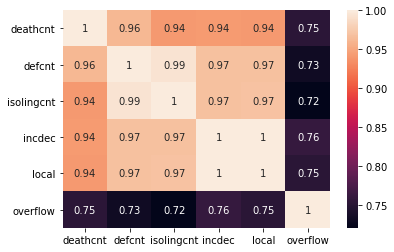

In [18]:
import seaborn as sns
sns.heatmap(ndf.corr(),annot=True)

In [ ]:
#for i in ndf['stdday']:
#   날짜 = i.split('일')[0]
#    날짜.replace()
# 대략 for문으로 하나씩 바꾸는 것이 속도가 빠르다

In [21]:
# 날짜형식 (이 방법은 속도가 느리다)
ndf['date']=ndf['stdday'].str.split('일').str[0]
ndf['date']=ndf['date'].str.replace('년','-')
ndf['date']=ndf['date'].str.replace('월','-')
ndf['date']=ndf['date'].str.replace(' ','')
ndf

C:\Users\igksj\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,ji,stdday,deathcnt,defcnt,isolingcnt,incdec,local,overflow,date
1,제주,2021년 08월 31일 00시,2,2602,270,9,8,1,2021-08-31
2,경남,2021년 08월 31일 00시,31,9980,858,56,56,0,2021-08-31
3,경북,2021년 08월 31일 00시,88,7100,618,27,27,0,2021-08-31
4,전남,2021년 08월 31일 00시,19,2600,206,14,13,1,2021-08-31
5,전북,2021년 08월 31일 00시,60,3588,354,26,26,0,2021-08-31
...,...,...,...,...,...,...,...,...,...
511,울산,2021년 08월 04일 00시,41,3262,145,15,14,1,2021-08-04
512,대전,2021년 08월 04일 00시,30,4459,1121,59,59,0,2021-08-04
513,광주,2021년 08월 04일 00시,24,3464,215,16,15,1,2021-08-04
514,인천,2021년 08월 04일 00시,66,9342,1144,83,83,0,2021-08-04


In [23]:
from datetime import datetime, timedelta
ndf['date'] = pd.to_datetime(ndf['date'])

C:\Users\igksj\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
ndf['year']=ndf['date'].dt.year
ndf['month']=ndf['date'].dt.month
ndf['day']=ndf['date'].dt.day
ndf['dayname']=ndf['date'].dt.weekday_name

In [33]:
ndf.head()

,ji,stdday,deathcnt,defcnt,isolingcnt,incdec,local,overflow,date,year,month,day,dayname
1,제주,2021년 08월 31일 00시,2,2602,270,9,8,1,2021-08-31,2021,8,31,1
2,경남,2021년 08월 31일 00시,31,9980,858,56,56,0,2021-08-31,2021,8,31,1
3,경북,2021년 08월 31일 00시,88,7100,618,27,27,0,2021-08-31,2021,8,31,1
4,전남,2021년 08월 31일 00시,19,2600,206,14,13,1,2021-08-31,2021,8,31,1
5,전북,2021년 08월 31일 00시,60,3588,354,26,26,0,2021-08-31,2021,8,31,1


In [ ]:
import matplotlib.pyplot as plt
list = ndf['ji'].unique()

for i in list:
    tmp = ndf[ndf['ji']==i]
    sns.boxplot(x='month',y='defcnt',hue=tmp['month'],data=tmp)
    plt.show()